<a href="https://colab.research.google.com/github/imenchbili03082004-cmd/projetML_ArbreDecision_seattle_weather/blob/main/tp2_algo_nonSupervis%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
data = {
    'Age': [22, 25, 47, 52, 46, 56, 23, 24, 50, 51],
    'Income': [2000, 2200, 5000, 5200, 4800, 6000, 2100, 2300, 5100, 5300]
}
df = pd.DataFrame(data)

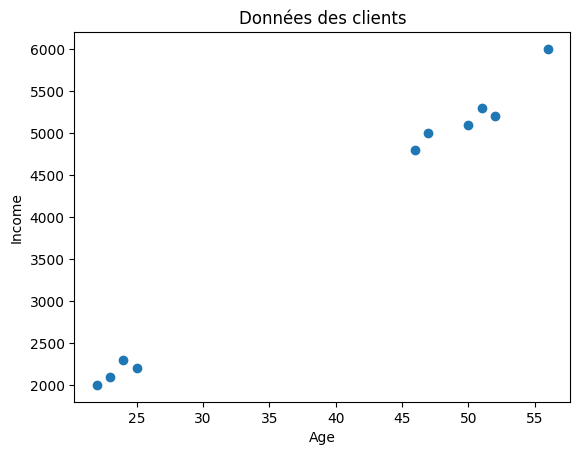

In [ ]:
plt.scatter(df['Age'],df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Données des clients')
plt.show()

In [ ]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df)

In [ ]:
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(x_scaled)
#ou bien df['Cluster']=kmeans.fit_predict(x_scaled)

KMeans(n_clusters=2, random_state=42)

In [ ]:
print("Clusters :", kmeans.labels_)
print("Centres :", kmeans.cluster_centers_)

Clusters : [1 1 0 0 0 0 1 1 0 0]
Centres : [[ 0.80037123  0.80079827]
 [-1.20055685 -1.20119741]]


In [ ]:
Labels=kmeans.labels_
centroids=kmeans.cluster_centers_
original_centers=kmeans.inverse_transform(centroids)
df["Cluster"]=Labels
df

,Age,Income,Cluster
0,22,2000,1
1,25,2200,1
2,47,5000,0
3,52,5200,0
4,46,4800,0
5,56,6000,0
6,23,2100,1
7,24,2300,1
8,50,5100,0
9,51,5300,0


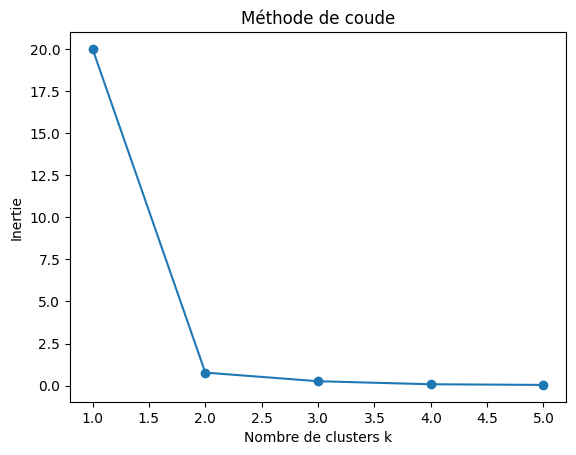

In [ ]:
inertia= []
K=range(1,6)
for k in K:
  km=KMeans(n_clusters=k)
  km.fit(x_scaled)
  inertia.append(km.inertia_)
plt.plot(K,inertia,marker='o')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Inertie')
plt.title('Méthode de coude')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit_predict(x_scaled)

array([1, 1, 2, 0, 2, 0, 1, 1, 0, 0], dtype=int32)

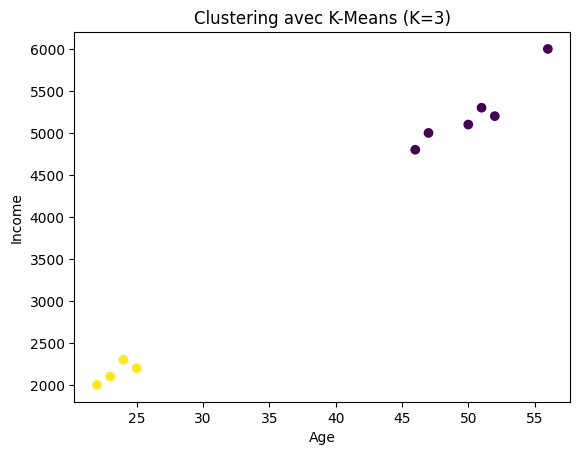

In [ ]:
plt.scatter(df['Age'], df['Income'], c=df['Cluster'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Clustering avec K-Means (K=3)")
plt.show()

In [ ]:
#pour évaluer un modèle non supervisé, on utilise Silhouette Score (le plus utilisé): Il mesure la cohésion intra-cluster et la séparation inter-clusters
#-1 → mauvais
# 0 → chevauchement
#+1 → très bon clustering
from sklearn.metrics import silhouette_score

score = silhouette_score(x_scaled, kmeans.labels_)
print(score)


0.6091216734796367


In [ ]:
#On utilise .fit() quand on veut entraîner le modèle et analyser ensuite les attributs,
#tandis que .fit_predict() est un raccourci qui permet d’entraîner le modèle et d’obtenir directement les labels.
#exemple:
#kmeans.fit(x_scaled) puis labels1 = kmeans.labels_
#labels2 = kmeans.fit_predict(x_scaled)
#labels1 == labels2